In [1]:
from model import UNET
from util import *
import tensorflow as tf
import numpy as np


import os
import tarfile

In [2]:
dataPath = os.path.join(".","Data","Images")
maskPath = os.path.join(".","Data","Segmentation")
dataType = "*.png"

SEED = 42
DATA_SPLIT = 1

OPTIMIZER = "adam"
LOSS = "binary_crossentropy"
METRICS = ["accuracy"]

In [3]:
if not os.path.isdir(dataPath) or not os.path.isdir(maskPath):
    #untar the data if it hasnt been
    print("UNZIPPING DATA")
    with tarfile.open(os.path.join(".","Data","data.tar.gz")) as file:
        file.extractall(os.path.join(".","Data"))


Metal device set to: Apple M1 Pro


2022-02-26 15:45:54.406856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-26 15:45:54.406986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-26 15:45:54.476286: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-26 15:45:54.476530: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


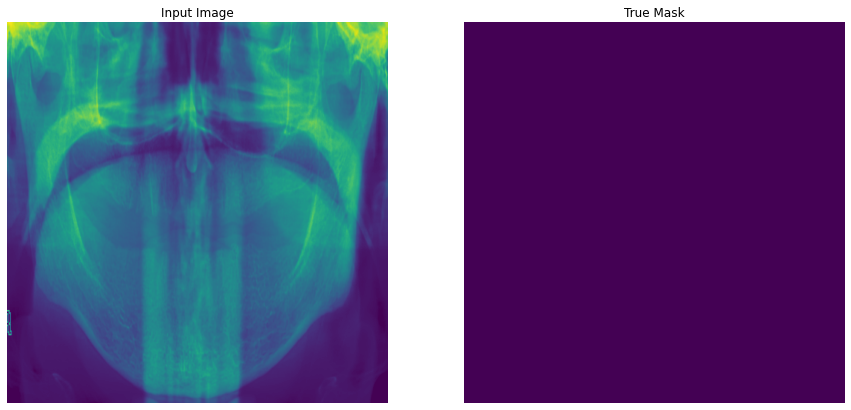

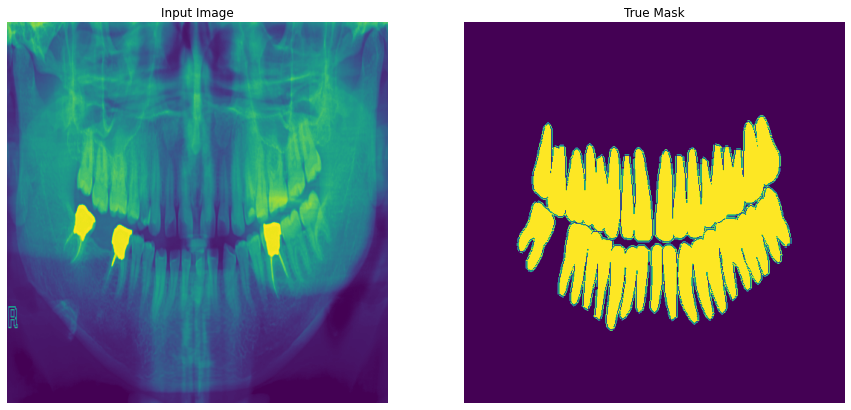

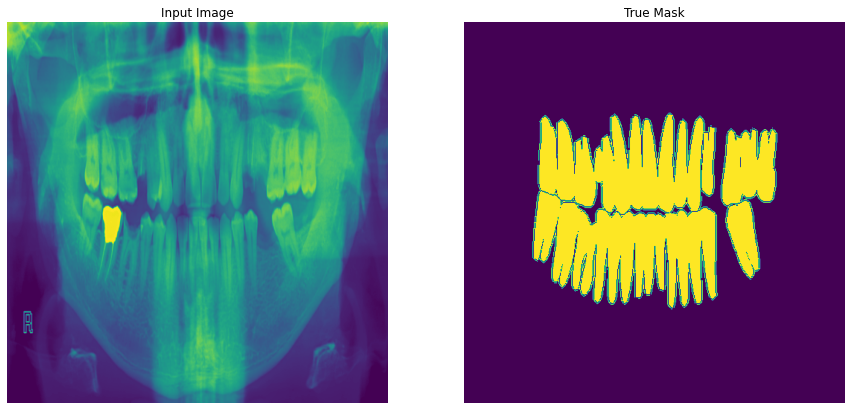

In [4]:
# LOAD DATASET AS TF DATASET
dataset = generate_dataset(dataPath, dataType, seed=SEED, img_shape = [512,512])
for element in dataset.take(3):
    image_shape = element["image"].numpy().shape
    display_mask_image([element["image"],element["mask"]])
    
split_point = np.ceil(len(dataset)*DATA_SPLIT)
train = dataset.take(split_point).map(lambda x: (x["image"],x["mask"]))
test = dataset.skip(split_point).map(lambda x: (x["image"],x["mask"]))


In [5]:
print("IMAGE SHAPE -> {shp}".format(shp=(image_shape)))
model = UNET(input_shape = image_shape)
model.summary()
model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)

IMAGE SHAPE -> (512, 512, 1)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
Down1A (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
Down1B (Dropout)                (None, 512, 512, 32) 0           Down1A[0][0]                     
__________________________________________________________________________________________________
Down1C (Conv2D)                 (None, 512, 512, 32) 9248        Down1B[0][0]                     
_________________________________________________________________

In [6]:
#for some reason, passing the dataset directly into the model is giving me all sorts of trouble, let us instead
xtrain = np.array([x[0] for x in train])
ytrain = np.array([x[1] for x in train])

xtest = np.array([x[0] for x in test])
ytest = np.array([x[1] for x in test])

In [7]:
len(xtrain)

116

In [8]:
history = model.fit(xtrain,ytrain,validation_split = 0.1, batch_size=16,epochs=150,verbose=1)
model.save('./trained')

Epoch 1/150


2022-02-26 15:45:58.344460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.5551 - accuracy: 0.7227

2022-02-26 15:46:23.205823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 26s 4s/step - loss: 0.5551 - accuracy: 0.7227 - val_loss: 0.6618 - val_accuracy: 0.7358
Epoch 2/150
7/7 [==============================] - 26s 4s/step - loss: 0.4231 - accuracy: 0.7739 - val_loss: 1.2931 - val_accuracy: 0.6052
Epoch 3/150
7/7 [==============================] - 25s 4s/step - loss: 0.3478 - accuracy: 0.8252 - val_loss: 8.7063 - val_accuracy: 0.7579
Epoch 4/150
7/7 [==============================] - 25s 4s/step - loss: 0.3145 - accuracy: 0.8523 - val_loss: 20.4675 - val_accuracy: 0.7371
Epoch 5/150
7/7 [==============================] - 25s 4s/step - loss: 0.2904 - accuracy: 0.8662 - val_loss: 21.5539 - val_accuracy: 0.7371
Epoch 6/150
7/7 [==============================] - 25s 4s/step - loss: 0.2756 - accuracy: 0.8748 - val_loss: 13.7828 - val_accuracy: 0.7371
Epoch 7/150
7/7 [==============================] - 25s 4s/step - loss: 0.2675 - accuracy: 0.8789 - val_loss: 13.2726 - val_accuracy: 0.7371
Epoch 8/150
7/7 [==================

7/7 [==============================] - 28s 4s/step - loss: 0.1239 - accuracy: 0.9496 - val_loss: 0.5658 - val_accuracy: 0.8381
Epoch 60/150
7/7 [==============================] - 28s 4s/step - loss: 0.1191 - accuracy: 0.9519 - val_loss: 0.6049 - val_accuracy: 0.8352
Epoch 61/150
7/7 [==============================] - 28s 4s/step - loss: 0.1150 - accuracy: 0.9536 - val_loss: 0.7365 - val_accuracy: 0.8323
Epoch 62/150
7/7 [==============================] - 28s 4s/step - loss: 0.1126 - accuracy: 0.9546 - val_loss: 0.6691 - val_accuracy: 0.8311
Epoch 63/150
7/7 [==============================] - 28s 4s/step - loss: 0.1107 - accuracy: 0.9554 - val_loss: 1.0190 - val_accuracy: 0.8104
Epoch 64/150
7/7 [==============================] - 28s 4s/step - loss: 0.1090 - accuracy: 0.9558 - val_loss: 0.8851 - val_accuracy: 0.8203
Epoch 65/150
7/7 [==============================] - 28s 4s/step - loss: 0.1078 - accuracy: 0.9564 - val_loss: 0.6666 - val_accuracy: 0.8442
Epoch 66/150
7/7 [===============

7/7 [==============================] - 28s 4s/step - loss: 0.0527 - accuracy: 0.9731 - val_loss: 0.6355 - val_accuracy: 0.8655
Epoch 118/150
7/7 [==============================] - 28s 4s/step - loss: 0.0525 - accuracy: 0.9732 - val_loss: 0.6999 - val_accuracy: 0.8600
Epoch 119/150
7/7 [==============================] - 28s 4s/step - loss: 0.0520 - accuracy: 0.9733 - val_loss: 0.7458 - val_accuracy: 0.8586
Epoch 120/150
7/7 [==============================] - 28s 4s/step - loss: 0.0514 - accuracy: 0.9734 - val_loss: 0.7834 - val_accuracy: 0.8510
Epoch 121/150
7/7 [==============================] - 28s 4s/step - loss: 0.0518 - accuracy: 0.9733 - val_loss: 0.8605 - val_accuracy: 0.8505
Epoch 122/150
7/7 [==============================] - 28s 4s/step - loss: 0.0510 - accuracy: 0.9735 - val_loss: 0.7375 - val_accuracy: 0.8626
Epoch 123/150
7/7 [==============================] - 28s 4s/step - loss: 0.0506 - accuracy: 0.9735 - val_loss: 0.7822 - val_accuracy: 0.8574
Epoch 124/150
7/7 [========

2022-02-26 16:54:00.625683: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./trained/assets


In [9]:
train_predictions = model.predict(xtrain[0:3])
test_predictions = model.predict(xtest[0:3])

2022-02-26 16:54:02.503013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


ValueError: Expect x to be a non-empty array or dataset.

# Lets view results after training

In [ ]:
#TRAINING
display_mask_image([xtrain[0],ytrain[0]])
display_mask_image([xtrain[0],train_predictions[0]])

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])